In [21]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.segmentation import mark_boundaries
import numpy as np
from skimage.filters import threshold_otsu, threshold_local

from skimage import data, img_as_float
from skimage import exposure
from skimage.color import rgb2gray
from skimage.morphology import label
from skimage import data

## Segmentation is an ill-posed problem

In [2]:
# Loading data
gt = loadmat('258089.mat')
gt = np.squeeze(gt['groundTruth'])
im = imread('258089.jpg')

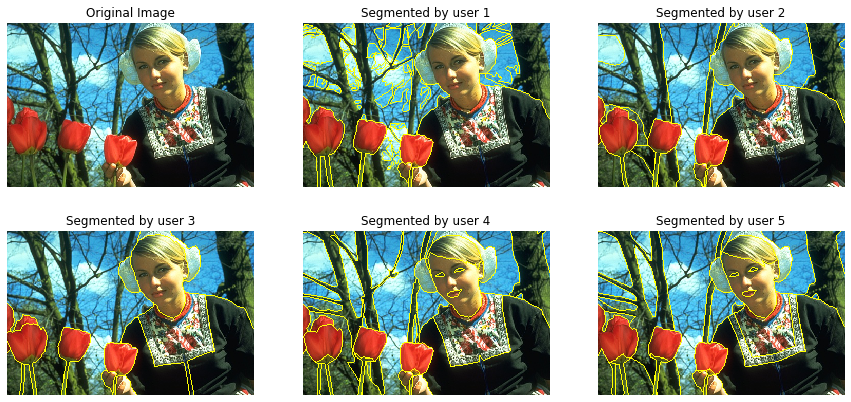

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
for ax_idx, ax in enumerate(axes.flat):
    if ax_idx == 0:
        ax.imshow(im)
        ax.set_title('Original Image')
        ax.axis('off')
    else:
        ax.imshow(mark_boundaries(im, gt[ax_idx - 1][0][0][0]))
        ax.set_title('Segmented by user {}'.format(ax_idx))
        ax.axis('off')
plt.show()

## Thresholding Segmentation

### Preprocessing

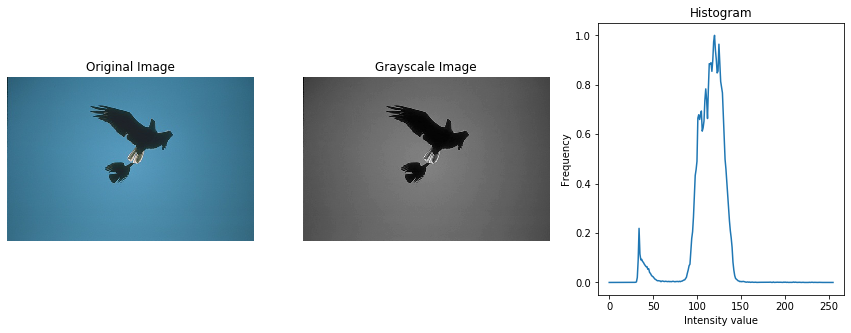

In [4]:
im = imread('135069.jpg') # Open image
im_gray = (rgb2gray(im) * 255).astype(np.uint8)  # Convert to grayscale image
img_hist, bins = exposure.histogram(im_gray, nbins=256, source_range='dtype') # Calculate histogram

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(im_gray, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')
axes[2].plot(bins, img_hist / img_hist.max())
axes[2].set_title('Histogram')
axes[2].set_ylabel('Frequency')
axes[2].set_xlabel('Intensity value')
plt.show()

## Global thresholding
### Setting manually a threshold

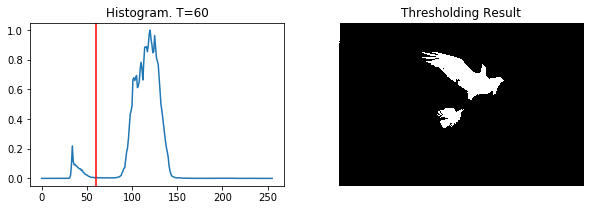

In [6]:
th = 60 # treshold 

im = imread('135069.jpg') # Open image
im_gray = (rgb2gray(im) * 255).astype(np.uint8)  # Convert to grayscale image

tresholded = im_gray < th # Threshold

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].plot(bins, img_hist / img_hist.max())
axes[0].axvline(th, color='r')
axes[0].set_title('Histogram. T={}'.format(th))
axes[1].imshow(tresholded, cmap='gray')
axes[1].set_title('Thresholding Result')
axes[1].axis('off')
plt.show()


### Automatic simple threshold

In [10]:
def threshold_finding(im_gray):
    th_0 = 122
    th_1 = 1
    while th_0 != th_1:
        th_1 = th_0
        mu_bg = np.mean(im_gray[im_gray < th_0])
        mu_fg = np.mean(im_gray[im_gray >= th_0])
        th_0 = (mu_bg + mu_fg) // 2
    return th_0

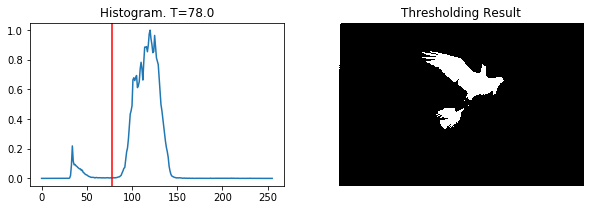

In [11]:
im = imread('135069.jpg') # Open image
im_gray = (rgb2gray(im) * 255).astype(np.uint8)  # Convert to grayscale image

th = threshold_finding(im_gray) # Threshold
tresholded = im_gray < th

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].plot(bins, img_hist / img_hist.max())
axes[0].axvline(th, color='r')
axes[0].set_title('Histogram. T={}'.format(th))
axes[1].imshow(tresholded, cmap='gray')
axes[1].set_title('Thresholding Result')
axes[1].axis('off')
plt.show()

### Otsu threshold

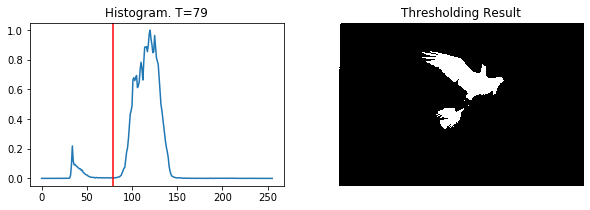

In [12]:
im = imread('135069.jpg') # Open image
im_gray = (rgb2gray(im) * 255).astype(np.uint8)  # Convert to grayscale image

th = threshold_otsu(im_gray) # Threshold
tresholded = im_gray < th

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].plot(bins, img_hist / img_hist.max())
axes[0].axvline(th, color='r')
axes[0].set_title('Histogram. T={}'.format(th))
axes[1].imshow(tresholded, cmap='gray')
axes[1].set_title('Thresholding Result')
axes[1].axis('off')
plt.show()

## Local thresholding
### Global thresholding problems

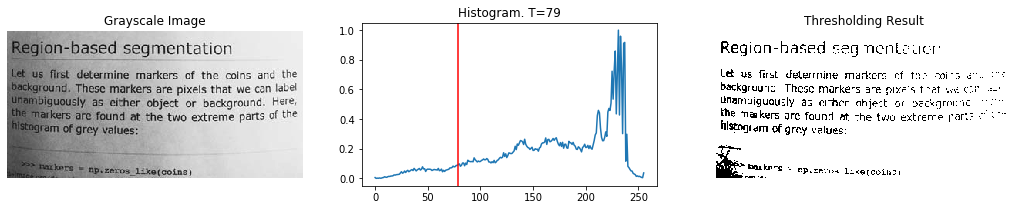

In [20]:
im = data.page()
th = threshold_otsu(im_gray) # Threshold

tresholded = im > th
img_hist, bins = exposure.histogram(im, nbins=256, source_range='dtype')

fig, axes = plt.subplots(1, 3, figsize=(18, 3))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')
axes[1].plot(bins, img_hist / img_hist.max())
axes[1].axvline(th, color='r')
axes[1].set_title('Histogram. T={}'.format(th))
axes[2].imshow(tresholded, cmap='gray')
axes[2].set_title('Thresholding Result')
axes[2].axis('off')
plt.show()

### Local thresholding

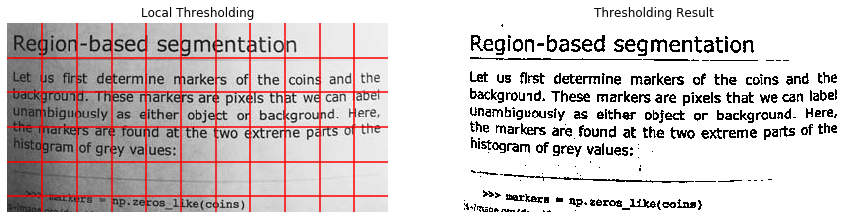

In [29]:
block_size = 35
local_thresh = threshold_local(im, block_size, offset=10)
binary_local = im > local_thresh

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(im, cmap='gray')
for i in range(im.shape[1]//block_size):
    axes[0].axvline(35 * (i + 1), color='r')
for i in range(im.shape[0]//block_size):
    axes[0].axhline(35 * (i + 1), color='r')
axes[0].set_title('Local Thresholding')
axes[0].axis('off')
axes[1].imshow(binary_local, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Thresholding Result')
plt.show()

In [ ]:
## Superpixel segmentation (SLIC)

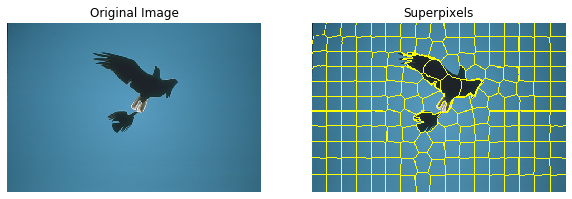

In [41]:
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries

im = imread('135069.jpg')

segments = slic(im, n_segments=200, compactness=10, sigma=1)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(im)
axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].imshow(mark_boundaries(im, segments))
axes[1].axis('off')
axes[1].set_title('Superpixels')
plt.show()